Linear regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("/Users/danielleviev/CS484/Housing.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df = df.drop(columns= ["id", "date", "zipcode"]) #drop irelevant features
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

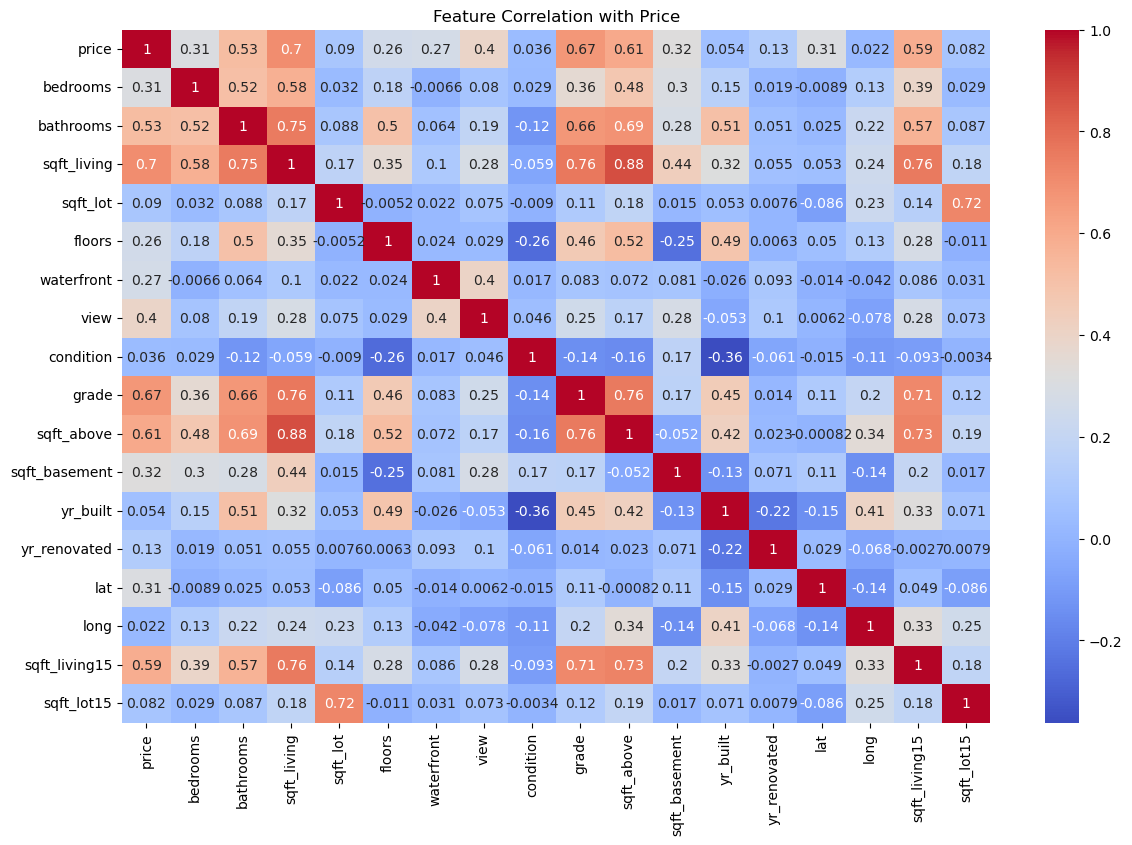

In [4]:
corr_matrix = df.corr()
plt.figure(figsize=(14, 9))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Price")
plt.show()


In [5]:
corr_threshold = 0.3  # Select features with correlation above this value
top_features = corr_matrix['price'][abs(corr_matrix['price']) > corr_threshold].index.tolist()
print("Top features correlated with price:", top_features)

Top features correlated with price: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']


In [6]:
from scipy.stats import zscore
#separate IV from DV
X = df[top_features].drop(columns=["price"])
y = df["price"]

z_scores = np.abs(zscore(X)) 
threshold = 3 
outliers = np.any(z_scores > threshold, axis=1)
X_clean = X[~outliers]
y_clean = y[~outliers]

print(f"Number of outliers removed: {np.sum(outliers)}")



Number of outliers removed: 1450


Linear Regression Model Metrics:
Train R²: 0.6015
Test R²: 0.5844
Train MSE: 26543908370.6396
Test MSE: 27311753960.6713
Train RMSE: 162923.0136
Test RMSE: 165262.6817


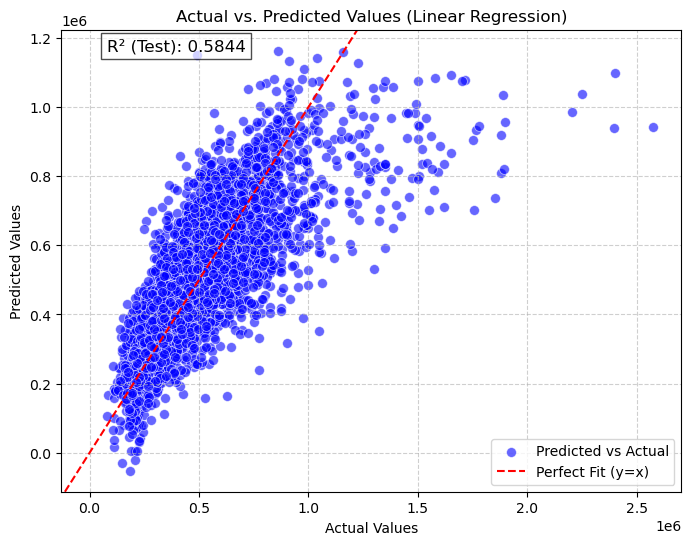

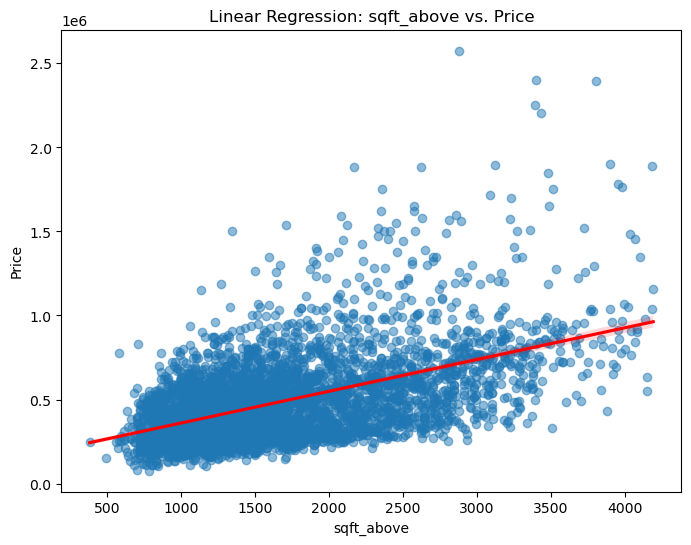

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"Linear Regression Model Metrics:")
print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")
print(f"Train MSE: {mse_train:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")

plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6, color="blue", s=50, label="Predicted vs Actual")
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Fit (y=x)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.text(min(y_test), max(y_test_pred), f"R² (Test): {r2_test:.4f}", fontsize=12, color="black", 
         bbox=dict(facecolor='white', alpha=0.7))

plt.show()

feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
top_feature = feature_importance.iloc[0]['Feature']  # Most predictive feature
plt.figure(figsize=(8, 6))
sns.regplot(x=X_test[top_feature], y=y_test, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel(top_feature)
plt.ylabel("Price")
plt.title(f"Linear Regression: {top_feature} vs. Price")
plt.show()




Ridge Regression


Ridge Regression Model:
Train R²: 0.6016
Test R²: 0.5843
Train MSE: 26540782363.7225
Test MSE: 27319653348.7857
Train RMSE: 162913.4198
Test RMSE: 165286.5795


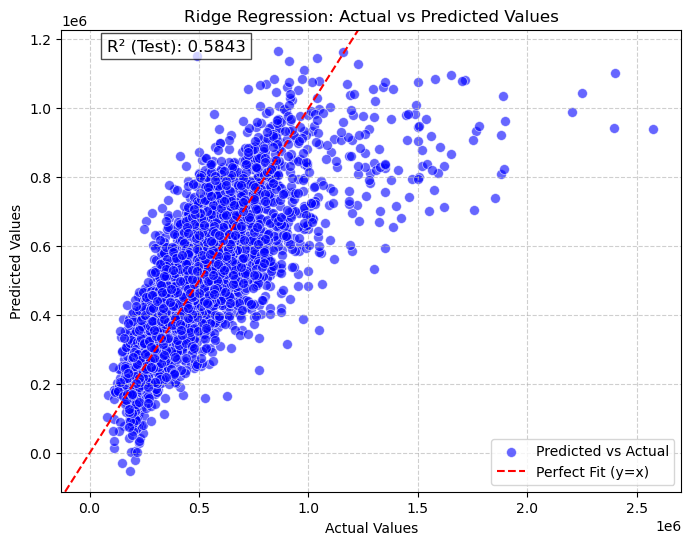

In [8]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predictions for Train and Test data
y_train_ridge_pred = ridge.predict(X_train_scaled)
y_test_ridge_pred = ridge.predict(X_test_scaled)

mse_train_ridge = mean_squared_error(y_train, y_train_ridge_pred)
mse_test_ridge = mean_squared_error(y_test, y_test_ridge_pred)

r2_train_ridge = r2_score(y_train, y_train_ridge_pred)
r2_test_ridge = r2_score(y_test, y_test_ridge_pred)

rmse_train_ridge = np.sqrt(mse_train_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)

print(f"\nRidge Regression Model:")
print(f"Train R²: {r2_train_ridge:.4f}")
print(f"Test R²: {r2_test_ridge:.4f}")
print(f"Train MSE: {mse_train_ridge:.4f}")
print(f"Test MSE: {mse_test_ridge:.4f}")
print(f"Train RMSE: {rmse_train_ridge:.4f}")
print(f"Test RMSE: {rmse_test_ridge:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_ridge_pred, alpha=0.6, color="blue", s=50, label="Predicted vs Actual")
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Fit (y=x)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs Predicted Values")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.text(min(y_test), max(y_test_ridge_pred), f"R² (Test): {r2_test_ridge:.4f}", fontsize=12, color="black", 
         bbox=dict(facecolor='white', alpha=0.7))

plt.show()


Lasso Regression


Lasso Regression Model:
Train R²: 0.6016
Test R²: 0.5843
Train MSE: 26540782271.2016
Test MSE: 27319654705.3733
Train RMSE: 162913.4196
Test RMSE: 165286.5836


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.581e+12, tolerance: 1.074e+11
  model = cd_fast.enet_coordinate_descent(


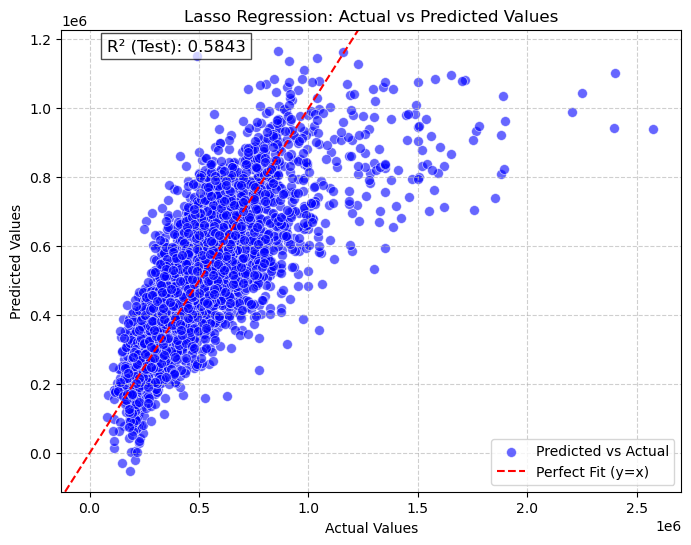

In [9]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_train_lasso_pred = lasso.predict(X_train_scaled)
y_test_lasso_pred = lasso.predict(X_test_scaled)

mse_train_lasso = mean_squared_error(y_train, y_train_lasso_pred)
mse_test_lasso = mean_squared_error(y_test, y_test_lasso_pred)

r2_train_lasso = r2_score(y_train, y_train_lasso_pred)
r2_test_lasso = r2_score(y_test, y_test_lasso_pred)

rmse_train_lasso = np.sqrt(mse_train_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)

print(f"\nLasso Regression Model:")
print(f"Train R²: {r2_train_lasso:.4f}")
print(f"Test R²: {r2_test_lasso:.4f}")
print(f"Train MSE: {mse_train_lasso:.4f}")
print(f"Test MSE: {mse_test_lasso:.4f}")
print(f"Train RMSE: {rmse_train_lasso:.4f}")
print(f"Test RMSE: {rmse_test_lasso:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_lasso_pred, alpha=0.6, color="blue", s=50, label="Predicted vs Actual")
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Fit (y=x)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs Predicted Values")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.text(min(y_test), max(y_test_lasso_pred), f"R² (Test): {r2_test_lasso:.4f}", fontsize=12, color="black", 
         bbox=dict(facecolor='white', alpha=0.7))

plt.show()

Polynomial regression


Polynomial Regression Model (Degree 3):
Train R²: 0.7392
Test R²: 0.7142
Train MSE: 17369153588.0208
Test MSE: 18783171492.3619
Train RMSE: 131792.0847
Test RMSE: 137051.7110


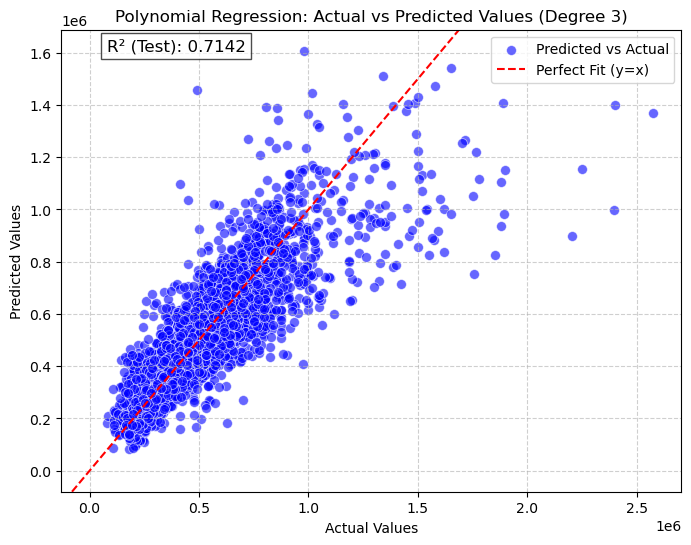

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=3)  
X_poly_train = poly_reg.fit_transform(X_train_scaled)
X_poly_test = poly_reg.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_train_poly_pred = poly_model.predict(X_poly_train)
y_test_poly_pred = poly_model.predict(X_poly_test)

mse_train_poly = mean_squared_error(y_train, y_train_poly_pred)
mse_test_poly = mean_squared_error(y_test, y_test_poly_pred)

r2_train_poly = r2_score(y_train, y_train_poly_pred)
r2_test_poly = r2_score(y_test, y_test_poly_pred)

rmse_train_poly = np.sqrt(mse_train_poly)
rmse_test_poly = np.sqrt(mse_test_poly)

print(f"\nPolynomial Regression Model (Degree 3):")
print(f"Train R²: {r2_train_poly:.4f}")
print(f"Test R²: {r2_test_poly:.4f}")
print(f"Train MSE: {mse_train_poly:.4f}")
print(f"Test MSE: {mse_test_poly:.4f}")
print(f"Train RMSE: {rmse_train_poly:.4f}")
print(f"Test RMSE: {rmse_test_poly:.4f}")

plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test, y=y_test_poly_pred, alpha=0.6, color="blue", s=50, label="Predicted vs Actual")
plt.axline((0, 0), slope=1, color="red", linestyle="--", label="Perfect Fit (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial Regression: Actual vs Predicted Values (Degree 3)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.text(min(y_test), max(y_test_poly_pred), f"R² (Test): {r2_test_poly:.4f}", fontsize=12, color="black", 
         bbox=dict(facecolor='white', alpha=0.7))

plt.show()


Performance Comparison

Comparison of R² Metrics Across Models:
+-----------------------+------------+-----------+
| Model                 |   Train R² |   Test R² |
+=======================+============+===========+
| Linear Regression     |   0.601507 |  0.584387 |
+-----------------------+------------+-----------+
| Ridge Regression      |   0.601554 |  0.584267 |
+-----------------------+------------+-----------+
| Lasso Regression      |   0.601554 |  0.584267 |
+-----------------------+------------+-----------+
| Polynomial Regression |   0.739244 |  0.714169 |
+-----------------------+------------+-----------+


Comparison of MSE Metrics Across Models:
+-----------------------+-------------+-------------+
| Model                 |   Train MSE |    Test MSE |
+=======================+=============+=============+
| Linear Regression     | 2.65439e+10 | 2.73118e+10 |
+-----------------------+-------------+-------------+
| Ridge Regression      | 2.65408e+10 | 2.73197e+10 |
+-----------------------+-------

/var/folders/fb/bv0r1m1x2fvddqq3hy64fd700000gn/T/ipykernel_12345/3177919249.py:39: DeprecationWarning: Call to deprecated function copy (Use copy(obj) or cell.obj = cell.obj + other).
  cell.font = cell.font.copy(bold=True)
/var/folders/fb/bv0r1m1x2fvddqq3hy64fd700000gn/T/ipykernel_12345/3177919249.py:40: DeprecationWarning: Call to deprecated function copy (Use copy(obj) or cell.obj = cell.obj + other).
  cell.alignment = cell.alignment.copy(horizontal='center')


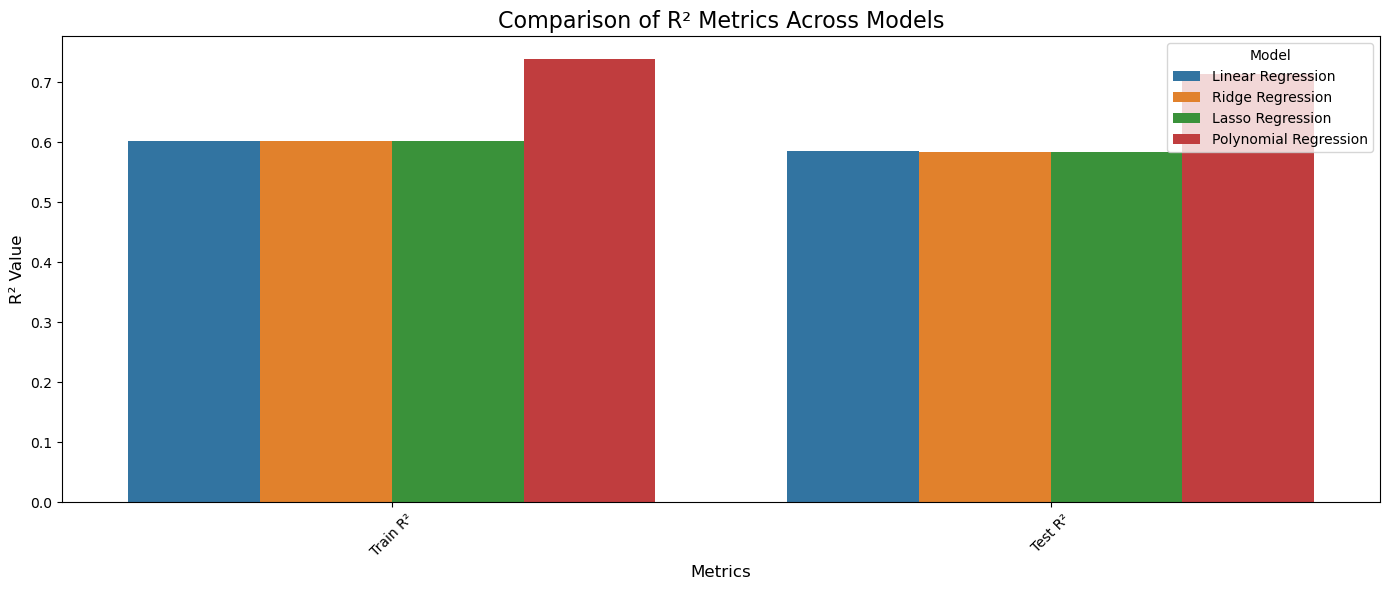

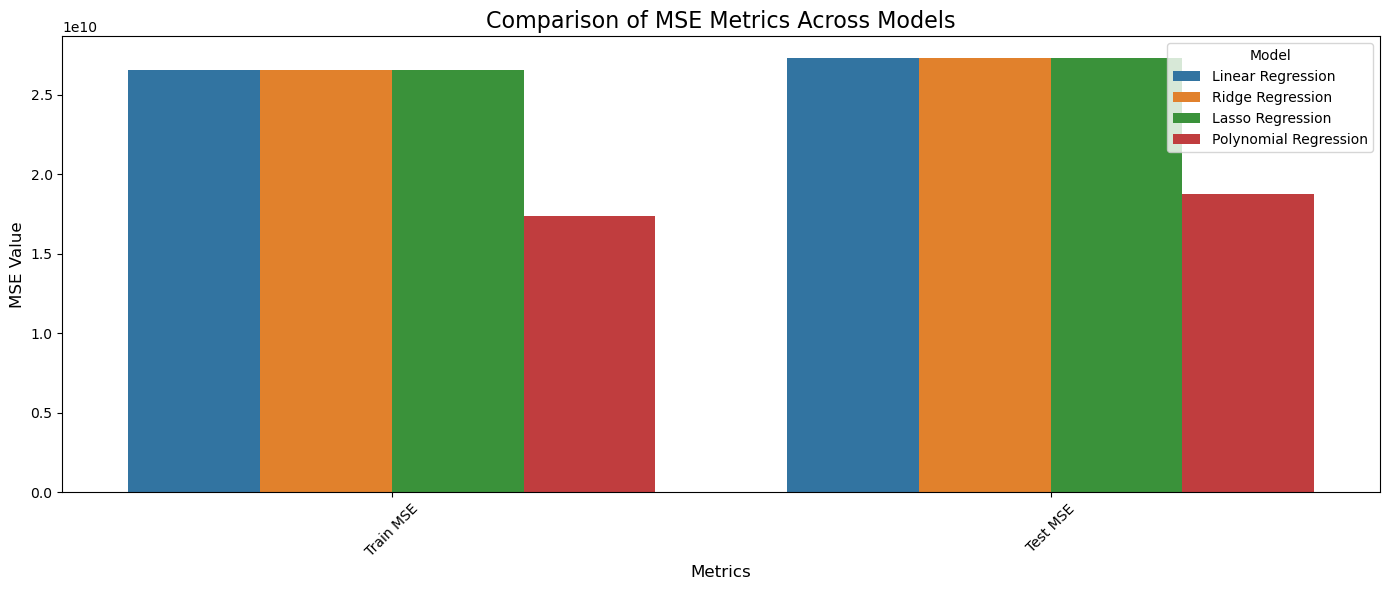

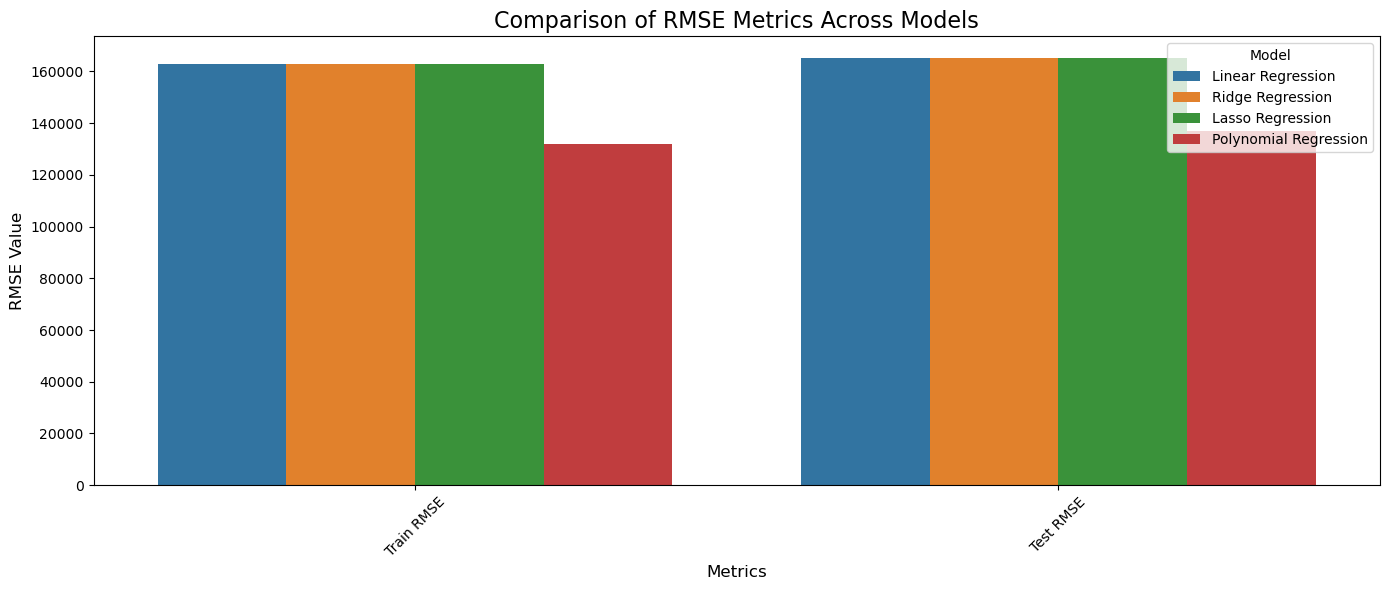

In [12]:
import matplotlib.pyplot as plt
from tabulate import tabulate

models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Polynomial Regression']

# Create a dictionary of metrics
metrics = {
    'Model': models,
    'Train R²': [r2_train, r2_train_ridge, r2_train_lasso, r2_train_poly],
    'Test R²': [r2_test, r2_test_ridge, r2_test_lasso, r2_test_poly],
    'Train MSE': [mse_train, mse_train_ridge, mse_train_lasso, mse_train_poly],
    'Test MSE': [mse_test, mse_test_ridge, mse_test_lasso, mse_test_poly],
    'Train RMSE': [rmse_train, rmse_train_ridge, rmse_train_lasso, rmse_train_poly],
    'Test RMSE': [rmse_test, rmse_test_ridge, rmse_test_lasso, rmse_test_poly]
}

df_metrics = pd.DataFrame(metrics)
print("Comparison of R² Metrics Across Models:")
print(tabulate(df_metrics[['Model', 'Train R²', 'Test R²']], headers='keys', tablefmt='grid', showindex=False))
print("\n")

print("Comparison of MSE Metrics Across Models:")
print(tabulate(df_metrics[['Model', 'Train MSE', 'Test MSE']], headers='keys', tablefmt='grid', showindex=False))
print("\n")

print("Comparison of RMSE Metrics Across Models:")
print(tabulate(df_metrics[['Model', 'Train RMSE', 'Test RMSE']], headers='keys', tablefmt='grid', showindex=False))


with pd.ExcelWriter('model_comparison_metrics.xlsx', engine='openpyxl') as writer:
    df_metrics.to_excel(writer, index=False, sheet_name='Metrics')


    workbook = writer.book
    sheet = workbook['Metrics']


    for cell in sheet[1]:
        cell.font = cell.font.copy(bold=True) 
        cell.alignment = cell.alignment.copy(horizontal='center')  


    for col in sheet.columns:
        max_length = 0
        column = col[0].column_letter  
        for cell in col:
            try:
                if len(str(cell.value)) > max_length:
                    max_length = len(cell.value)
            except:
                pass
        adjusted_width = (max_length + 2) 
        sheet.column_dimensions[column].width = adjusted_width


    from openpyxl.styles import Border, Side
    thin_border = Border(left=Side(style='thin'), right=Side(style='thin'),
                         top=Side(style='thin'), bottom=Side(style='thin'))

    for row in sheet.iter_rows():
        for cell in row:
            cell.border = thin_border

print("Excel file with formatted table has been created!")

# R2 metrics plot
df_r2 = df_metrics[['Model', 'Train R²', 'Test R²']].melt(id_vars="Model", var_name="Metric", value_name="Value")

plt.figure(figsize=(14, 6))
sns.barplot(x="Metric", y="Value", hue="Model", data=df_r2)
plt.title("Comparison of R² Metrics Across Models", fontsize=16)
plt.ylabel("R² Value", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MSE metrics plot
df_mse = df_metrics[['Model', 'Train MSE', 'Test MSE']].melt(id_vars="Model", var_name="Metric", value_name="Value")

plt.figure(figsize=(14, 6))
sns.barplot(x="Metric", y="Value", hue="Model", data=df_mse)
plt.title("Comparison of MSE Metrics Across Models", fontsize=16)
plt.ylabel("MSE Value", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# RMSE metrics plot
df_rmse = df_metrics[['Model', 'Train RMSE', 'Test RMSE']].melt(id_vars="Model", var_name="Metric", value_name="Value")

plt.figure(figsize=(14, 6))
sns.barplot(x="Metric", y="Value", hue="Model", data=df_rmse)
plt.title("Comparison of RMSE Metrics Across Models", fontsize=16)
plt.ylabel("RMSE Value", fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()